In [67]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('bankloan.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Dataset Pre-Processing

In [68]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64


In [69]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [ID, Age, Experience, Income, ZIP.Code, Family, CCAvg, Education, Mortgage, Personal.Loan, Securities.Account, CD.Account, Online, CreditCard]
Index: []


In [70]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


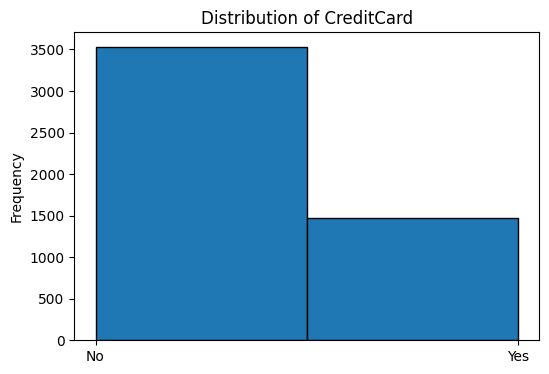

In [71]:
# Plot histogram for the CreditCard column
plt.figure(figsize=(6, 4))
plt.hist(df['CreditCard'], bins=2, edgecolor='black')
plt.title('Distribution of CreditCard')
# plt.xlabel('CreditCard (0 = No, 1 = Yes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [72]:
# Remove the 'ID' and 'ZIP.Code' column
df_cleaned = df.drop(columns=['ID','ZIP.Code'])

# Display the first few rows of the cleaned dataframe
df_cleaned.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [73]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df.drop('CreditCard', axis=1)
y = df['CreditCard']

# Split data into training and testing sets (70% train, 30% test), stratified by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Show the dimensions of the train and test sets
print(f"Training set dimensions: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set dimensions: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set dimensions: X_train: (3500, 13), y_train: (3500,)
Test set dimensions: X_test: (1500, 13), y_test: (1500,)


### Model Implementaitons

In [74]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

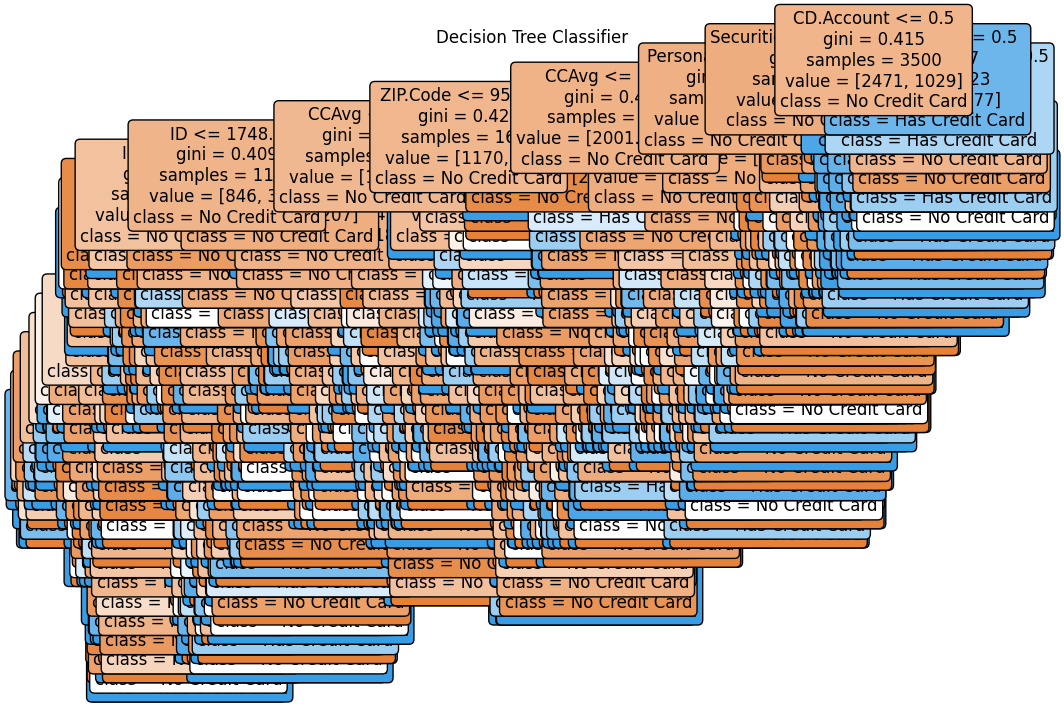

In [75]:
# Plot the decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(11, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Credit Card', 'Has Credit Card'], rounded=True, fontsize=12)
plt.title("Decision Tree Classifier")
plt.show()

### Model Evalutions

Accuracy: 0.63
Precision: 0.38
Recall: 0.37
F1-Score: 0.37


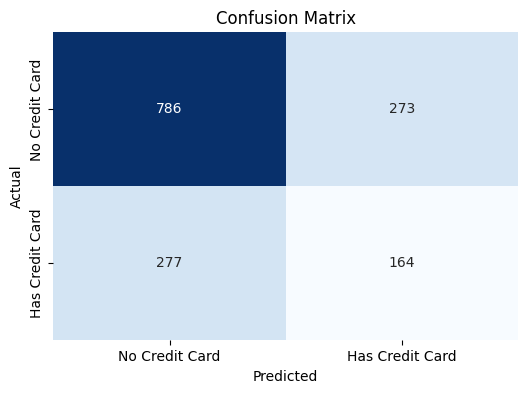

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Predict the target values for the test set
y_pred = clf.predict(X_test)

# Evaluate the model performance

# Accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy = accuracy_score(y_test, y_pred)

# Precision = TP / (TP + FP)
precision = precision_score(y_test, y_pred)

# Recall = TP / (TP + FN)
recall = recall_score(y_test, y_pred)

# F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")  # Proportion of total correct predictions
print(f"Precision: {precision:.2f}")  # Proportion of true positives among predicted positives
print(f"Recall: {recall:.2f}")  # Proportion of true positives among actual positives
print(f"F1-Score: {f1:.2f}")  # Harmonic mean of precision and recall

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Credit Card', 'Has Credit Card'],
            yticklabels=['No Credit Card', 'Has Credit Card'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Hyper parameter tuning

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters Found:  {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42}
Best Cross-Validation Accuracy: 0.75
Test Accuracy: 0.74
Precision: 0.90
Recall: 0.13
F1-Score: 0.22


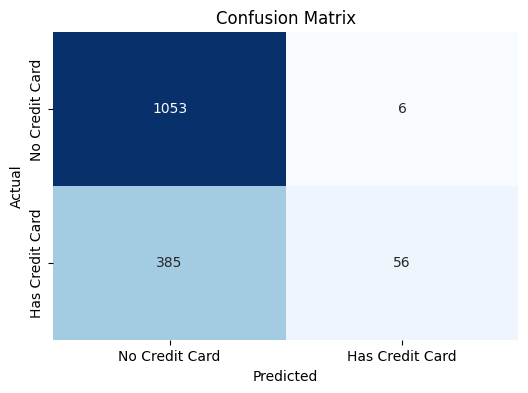

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # Add the missing comma here
    'random_state': [42]
}

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Display the results
print("Best Parameters Found: ", best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the model's performance on the test set
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best):.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Credit Card', 'Has Credit Card'],
            yticklabels=['No Credit Card', 'Has Credit Card'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


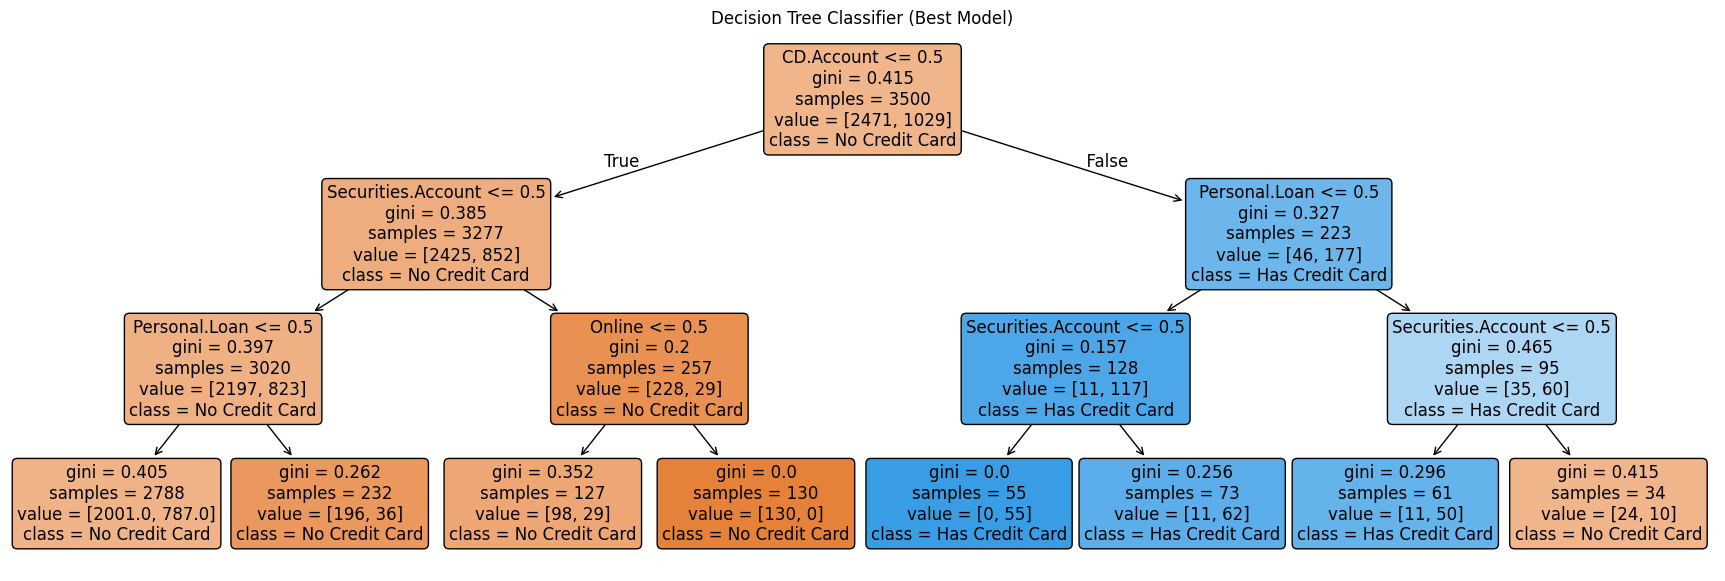

In [89]:
# Plot the decision tree of the best model
plt.figure(figsize=(22, 7))  # Set the size of the plot
plot_tree(best_model, filled=True, feature_names=X.columns,
          class_names=['No Credit Card', 'Has Credit Card'],
          rounded=True, fontsize=12)
plt.title("Decision Tree Classifier (Best Model)")
plt.show()

In [58]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [42]
}

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform Grid Search with 5-fold cross-validation on the resampled data
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the grid search to the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Display the results
print("Best Parameters Found: ", best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the model's performance on the test set
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best):.2f}")


Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters Found:  {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}
Best Cross-Validation Accuracy: 0.66
Test Accuracy: 0.58
Precision: 0.35
Recall: 0.48
F1-Score: 0.40


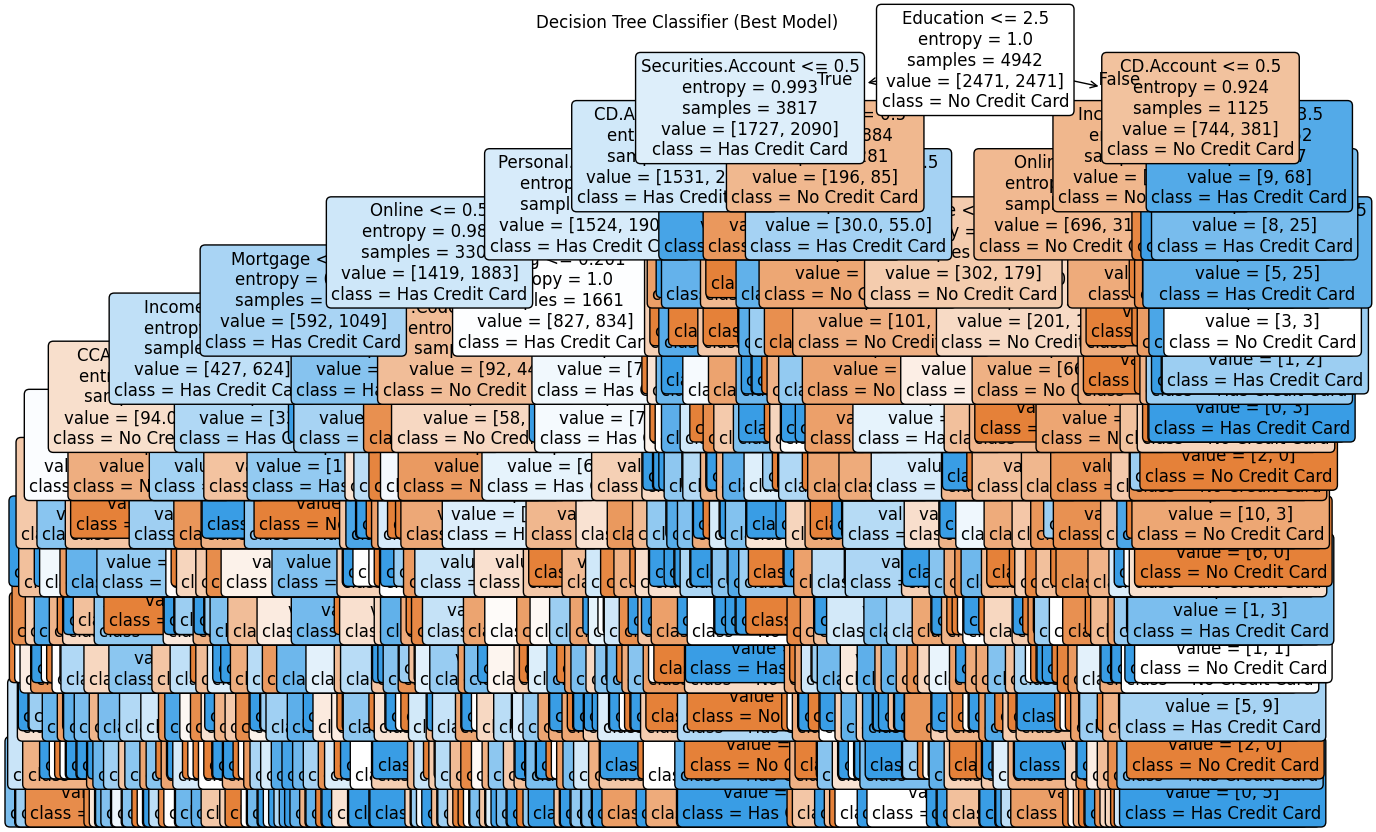

In [59]:
# Plot the decision tree of the best model
plt.figure(figsize=(15, 10))  # Set the size of the plot
plot_tree(best_model, filled=True, feature_names=X.columns,
          class_names=['No Credit Card', 'Has Credit Card'],
          rounded=True, fontsize=12)
plt.title("Decision Tree Classifier (Best Model)")
plt.show()